## Metadata Loading and Label Conversion

In [1]:
import pandas as pd

df = pd.read_csv('../SAMEED/HPA/HPA_metadata.csv')
df.replace({"TRUE": True, "FALSE": False}, inplace=True)
df.head()

,Idx,file,ID,cell_type,"actin filaments,focal adhesion sites",aggresome,"centrosome,centriolar satellite",cytosol,endoplasmic reticulum,golgi apparatus,...,mitotic spindle,no staining,nuclear bodies,nuclear membrane,nuclear speckles,nucleoli,nucleoli fibrillar center,nucleoplasm,"plasma membrane,cell junctions","vesicles,peroxisomes,endosomes,lysosomes,lipid droplets,cytoplasmic bodies"
0,0,/scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/10...,10005_921_B9_1,A-431,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,/scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/10...,10005_921_B9_1,A-431,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,/scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/10...,10005_921_B9_1,A-431,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,/scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/10...,10005_921_B9_1,A-431,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,/scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/10...,10005_921_B9_1,A-431,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert boolean labels to 1/0
label_cols = df.columns[4:]  
df[label_cols] = df[label_cols].astype(int)
print(df[label_cols].head())

   actin filaments,focal adhesion sites  aggresome  \
0                                     0          0   
1                                     0          0   
2                                     0          0   
3                                     0          0   
4                                     0          0   

   centrosome,centriolar satellite  cytosol  endoplasmic reticulum  \
0                                0        1                      0   
1                                0        1                      0   
2                                0        1                      0   
3                                0        1                      0   
4                                0        1                      0   

   golgi apparatus  intermediate filaments  microtubules  mitochondria  \
0                0                       0             0             0   
1                0                       0             0             0   
2                0              

To load the image metadata and ensure all label columns are correctly formatted as boolean values (`True`/`False`) for further processing and splitting.


## Dataset Splitting and Label Distribution Analysis

In [7]:
# Split 70% train, 20% test, 10% val
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
test_df, val_df = train_test_split(temp_df, test_size=1/3, random_state=42, shuffle=True)

In [8]:
# Check total number of columns
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Validation shape:", val_df.shape)

Train shape: (440785, 23)
Test shape: (125939, 23)
Validation shape: (62970, 23)


- **Train split**: 440,785 samples  
- **Test split**: 125,939 samples  
- **Validation split**: 62,970 samples  

In [9]:
# Check how many label columns we have
print("Number of label columns:", len(label_cols))
print("Label columns:", list(label_cols))

Number of label columns: 19
Label columns: ['actin filaments,focal adhesion sites', 'aggresome', 'centrosome,centriolar satellite', 'cytosol', 'endoplasmic reticulum', 'golgi apparatus', 'intermediate filaments', 'microtubules', 'mitochondria', 'mitotic spindle', 'no staining', 'nuclear bodies', 'nuclear membrane', 'nuclear speckles', 'nucleoli', 'nucleoli fibrillar center', 'nucleoplasm', 'plasma membrane,cell junctions', 'vesicles,peroxisomes,endosomes,lysosomes,lipid droplets,cytoplasmic bodies']


**- All 19 label columns are **preserved across all splits**, ensuring structural consistency.**

In [10]:
print("Train label columns:", train_df[label_cols].columns.tolist())
print("Test label columns:", test_df[label_cols].columns.tolist())
print("Val label columns:", val_df[label_cols].columns.tolist())

Train label columns: ['actin filaments,focal adhesion sites', 'aggresome', 'centrosome,centriolar satellite', 'cytosol', 'endoplasmic reticulum', 'golgi apparatus', 'intermediate filaments', 'microtubules', 'mitochondria', 'mitotic spindle', 'no staining', 'nuclear bodies', 'nuclear membrane', 'nuclear speckles', 'nucleoli', 'nucleoli fibrillar center', 'nucleoplasm', 'plasma membrane,cell junctions', 'vesicles,peroxisomes,endosomes,lysosomes,lipid droplets,cytoplasmic bodies']
Test label columns: ['actin filaments,focal adhesion sites', 'aggresome', 'centrosome,centriolar satellite', 'cytosol', 'endoplasmic reticulum', 'golgi apparatus', 'intermediate filaments', 'microtubules', 'mitochondria', 'mitotic spindle', 'no staining', 'nuclear bodies', 'nuclear membrane', 'nuclear speckles', 'nucleoli', 'nucleoli fibrillar center', 'nucleoplasm', 'plasma membrane,cell junctions', 'vesicles,peroxisomes,endosomes,lysosomes,lipid droplets,cytoplasmic bodies']
Val label columns: ['actin filament

In [11]:
print("Train label distribution:\n", train_df[label_cols].sum())
print("Test label distribution:\n", test_df[label_cols].sum())
print("Val label distribution:\n", val_df[label_cols].sum())

Train label distribution:
 actin filaments,focal adhesion sites                                           10141
aggresome                                                                       2400
centrosome,centriolar satellite                                                19447
cytosol                                                                       132350
endoplasmic reticulum                                                          12567
golgi apparatus                                                                30222
intermediate filaments                                                          7744
microtubules                                                                    9393
mitochondria                                                                   35659
mitotic spindle                                                                 1168
no staining                                                                    18862
nuclear bodies                        

In [12]:
train_counts = train_df[label_cols].sum().rename("Train")
test_counts = test_df[label_cols].sum().rename("Test")
val_counts = val_df[label_cols].sum().rename("Validation")

# Combine into one DataFrame
label_dist = pd.concat([train_counts, test_counts, val_counts], axis=1)


/tmp/ipykernel_53267/3019787441.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


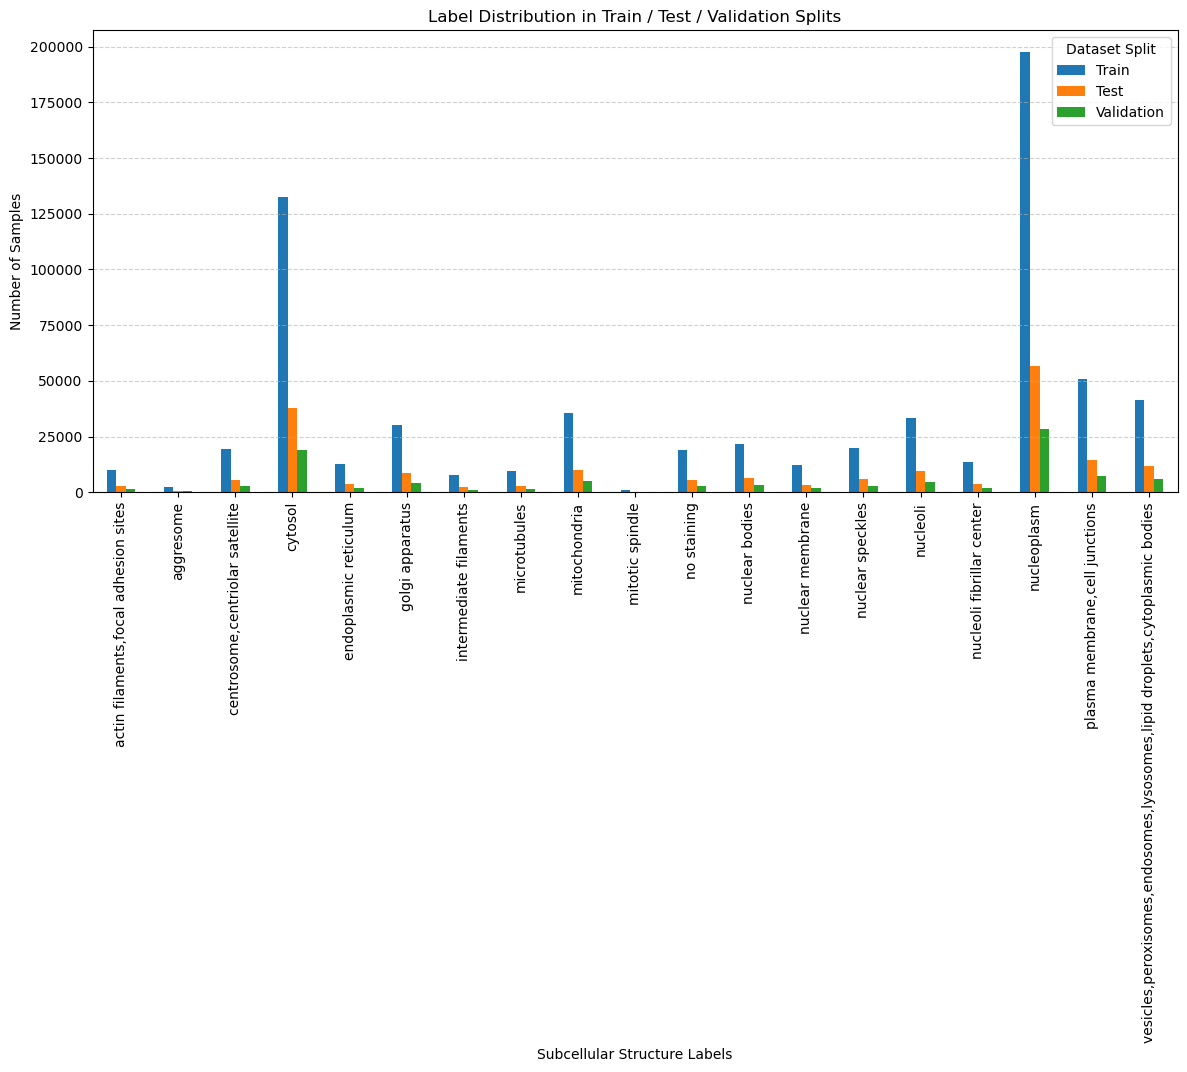

In [13]:
import matplotlib.pyplot as plt

# Plot
label_dist.plot(kind='bar', figsize=(14, 6))
plt.title("Label Distribution in Train / Test / Validation Splits")
plt.ylabel("Number of Samples")
plt.xlabel("Subcellular Structure Labels")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Dataset Split")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

- The bar plot shows that **high-frequency labels** (e.g., `nucleoplasm`, `cytosol`, `nucleoli`) appear consistently across all splits.
- **Rare classes** (e.g., `mitotic spindle`, `aggresome`) are still present, but in smaller numbers, as expected.

In [14]:
# Save to CSV
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)
val_df.to_csv("val.csv", index=False)


In [15]:
print(pd.read_csv("train.csv").head())

      Idx                                               file  \
0  492122  /scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/b3...   
1  626453  /scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/fe...   
2    2563  /scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/10...   
3  537038  /scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/bb...   
4  101195  /scratch3/SAMEED/HPA/HPA_DINO_CELLS/dataset/27...   

                                     ID cell_type  \
0  b3f6abc2-bba5-11e8-b2ba-ac1f6b6435d0      PC-3   
1  fe9afe52-bbc9-11e8-b2bc-ac1f6b6435d0   SH-SY5Y   
2                       10610_1584_F3_2      A549   
3  bbca156c-bbb1-11e8-b2ba-ac1f6b6435d0      PC-3   
4                       27978_259_A11_2     A-431   

   actin filaments,focal adhesion sites  aggresome  \
0                                     0          0   
1                                     0          0   
2                                     0          0   
3                                     0          0   
4                         

##  DataLoader Construction and Batch Verification

In [16]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import torch
import os

class MultiLabelImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        self.image_col = "file"  # change if your column is named differently
        self.label_cols = self.data.columns[4:]  # assuming first 4 columns are: Idx, file, ID, cell_type

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Load image
        img_path = row[self.image_col]
        image = Image.open(img_path).convert("RGB")

        # Apply transforms if given
        if self.transform:
            image = self.transform(image)

        # Load labels
        labels = torch.tensor(row[self.label_cols].values.astype("float32"))

        return image, labels

In [28]:
from torchvision import transforms
from torch.utils.data import DataLoader
from dataset import MultiLabelImageDataset

# Define image transformations
img_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add normalization if needed later
])

# Create dataset instances
train_dataset = MultiLabelImageDataset("train.csv", transform=img_transforms)
val_dataset = MultiLabelImageDataset("val.csv", transform=img_transforms)
test_dataset = MultiLabelImageDataset("test.csv", transform=img_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

__all__ = ["train_loader", "val_loader", "test_loader"]


In [18]:
# Get one batch
images, labels = next(iter(train_loader))
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32, 19])


- **Image batch shape**: `torch.Size([32, 3, 224, 224])`  
  ➤ Confirms that images are batched in the correct format: (Batch, Channels, Height, Width).

- **Label batch shape**: `torch.Size([32, 19])`  
  ➤ Confirms that labels are correctly loaded as 19-dimensional multi-label binary vectors.

### Preprocessing Validation: Raw Image vs Transformed Tensor

Original image size: (512, 512)
Transformed tensor shape: torch.Size([3, 224, 224])


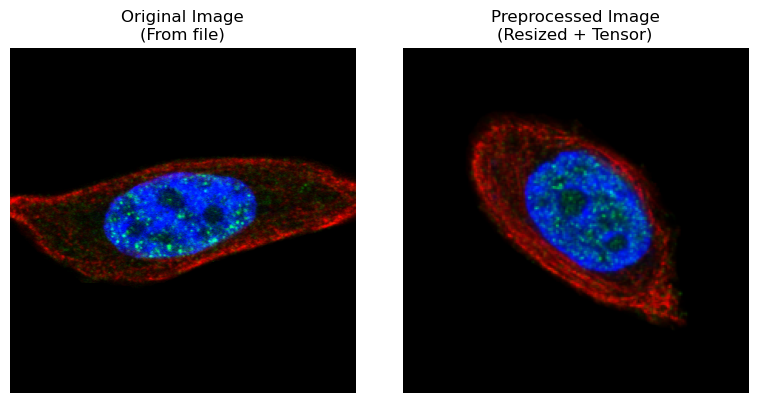

In [20]:
from PIL import Image

# Load an image from the raw file path (no transform)
raw_img_path = train_df.iloc[0]['file']
original_image = Image.open(raw_img_path).convert("RGB")
print("Original image size:", original_image.size)

# Show the same image from the DataLoader
images, labels = next(iter(train_loader))
transformed_image = images[0]

print("Transformed tensor shape:", transformed_image.shape)  # (C, H, W)

# Visualize side-by-side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Original image
ax[0].imshow(original_image)
ax[0].set_title("Original Image\n(From file)")
ax[0].axis("off")

# Transformed image (convert tensor to numpy)
img_np = transformed_image.permute(1, 2, 0).numpy()
ax[1].imshow(img_np)
ax[1].set_title("Preprocessed Image\n(Resized + Tensor)")
ax[1].axis("off")

plt.tight_layout()
plt.show()

- **Original image size**: `(512, 512)`  
  ➤ Image as stored in the dataset, unaltered.

- **Transformed tensor shape**: `torch.Size([3, 224, 224])`  
  ➤ Image resized and converted into a PyTorch-compatible tensor

 ### Interpretation

This comparison confirms that:
- The preprocessing pipeline is **successfully resizing** raw images to a fixed size of `224×224`, which is essential for deep learning model input.
- The image is **converted from PIL format to a 3-channel tensor** with shape `[C, H, W]` — standard for CNNs.
- The visual output provides an intuitive validation of the transformation steps and reassures that data is being fed to the model in the intended format.

 ### Batch Structure and Data Type Validation

In [21]:
print("Batch image shape:", images.shape)  # (B, 3, 224, 224)
print("Batch label shape:", labels.shape)  # (B, 19)
print("Image dtype:", images.dtype)
print("Label dtype:", labels.dtype)

Batch image shape: torch.Size([32, 3, 224, 224])
Batch label shape: torch.Size([32, 19])
Image dtype: torch.float32
Label dtype: torch.float32


### Output

- **Batch image shape**: `torch.Size([32, 3, 224, 224])`  
  ➤ 32 images per batch, with 3 RGB channels, each resized to 224×224 pixels.

- **Batch label shape**: `torch.Size([32, 19])`  
  ➤ 32 samples per batch, each with a 19-dimensional multi-label binary vector.

- **Image dtype**: `torch.float32`  
  ➤ Confirms successful application of `ToTensor()` transformation, with values normalized in `[0, 1]`.

- **Label dtype**: `torch.float32`  
  ➤ Ensures compatibility with `nn.BCEWithLogitsLoss()` for multi-label classification.

### Interpretation

This step confirms that:
- The `DataLoader` is producing correctly shaped batches that are ready for input into a CNN.
- All tensors are of type `float32`, which is the standard for PyTorch models and loss functions.
- The image–label pairing structure is fully aligned for downstream training and evaluation.


In [22]:
label_sum = labels.sum(dim=0)
for i, val in enumerate(label_sum):
    if val > 0:
        print(f"Label '{train_dataset.label_cols[i]}' appears in this batch ({int(val.item())} times)")

Label 'actin filaments,focal adhesion sites' appears in this batch (1 times)
Label 'centrosome,centriolar satellite' appears in this batch (1 times)
Label 'cytosol' appears in this batch (7 times)
Label 'golgi apparatus' appears in this batch (2 times)
Label 'microtubules' appears in this batch (1 times)
Label 'mitochondria' appears in this batch (5 times)
Label 'mitotic spindle' appears in this batch (1 times)
Label 'nuclear membrane' appears in this batch (1 times)
Label 'nuclear speckles' appears in this batch (2 times)
Label 'nucleoli' appears in this batch (5 times)
Label 'nucleoplasm' appears in this batch (16 times)
Label 'plasma membrane,cell junctions' appears in this batch (2 times)
Label 'vesicles,peroxisomes,endosomes,lysosomes,lipid droplets,cytoplasmic bodies' appears in this batch (4 times)


###  Output Highlights

- Labels like **`nucleoplasm`**, **`cytosol`**, and **`nucleoli`** appear more frequently — consistent with their high overall dataset distribution.
- Rare classes such as **`mitotic spindle`**, **`aggresome`**, or **`microtubules`** still appear occasionally, confirming that even infrequent labels can show up in random batches.
- A total of 14 out of 19 labels were present in just one batch.
    
###  Interpretation

This confirms that:
- The label distribution remains active and varied even within small batches, which is crucial for effective **multi-label learning**.
- Training batches are not sparse in label information, helping the model generalize across multiple classes.
- Rare labels are not completely excluded, reducing the risk of label imbalance or overfitting to dominant classes.

## Tensor Inspection: Pixel Values and Sample Verification

In [23]:
print("First 10 pixel values from channel 0 (red):")
print(transformed_image[0].flatten()[:10])

First 10 pixel values from channel 0 (red):
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [24]:
img, lbl = train_dataset[0]
print("Image shape:", img.shape)
print("Labels:", lbl)

Image shape: torch.Size([3, 224, 224])
Labels: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0.])


###  Output

- **Image shape**: `torch.Size([3, 224, 224])`  
  ➤ The image is a 3-channel RGB tensor resized to 224×224 pixels.

- **Pixel values (Red channel)**:  
  ➤ All values printed lie within `[0.0, 1.0]`, confirming successful normalization.

- **Label tensor**:  
  ➤ The label is a multi-hot encoded vector of length 19, indicating which subcellular structures are present in the sample.

###  Interpretation

This inspection step confirms:
- That image preprocessing is functioning as intended — producing normalized tensors in the expected shape.
- That label extraction from CSV is accurate and aligned with the image sample.
- It provides confidence that both inputs and targets are ready for training without further preprocessing.